# Heart Disease Prediction using Machine Learning

<hr>

File utilised: heart.csv

### Importing Libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data from CSV file

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + "/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Inference: From the dataset, we have three types of data such as continuous, ordinal, and binary data.

### Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Inference: From this output, our data does not contain null values and duplicates. So, the data is good which will be further analyzed.

**Checking the Target column**

In [4]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

Inference: 526 people have Heart Disease. 499 do not have Heart Disease.

**Plotting Crosstab of Target vs Sex**

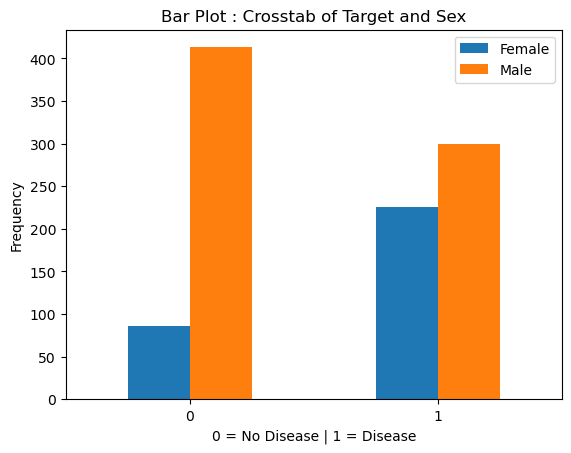

In [5]:
data = pd.crosstab(df['target'],df["sex"])
data.plot.bar()

plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.title("Bar Plot : Crosstab of Target and Sex")
plt.show()

**Plotting Heart Disease in relation to Age and Max Heart Rate**

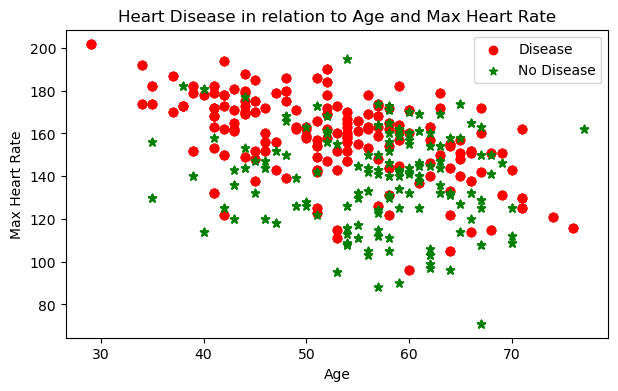

In [6]:
plt.figure(figsize=(7,4))

#scatter plot with "YES" target
plt.scatter(df['age'][df['target']==1],
           df['thalach'][df['target']==1],
           color="red",
           marker="o",
           label="Disease")


#scatter plot with "NO" target
plt.scatter(df['age'][df['target']==0],
           df['thalach'][df['target']==0],
           color="green",
           marker="*",
           label="No Disease")


plt.title("Heart Disease in relation to Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

**Checking the Distribution of Age**

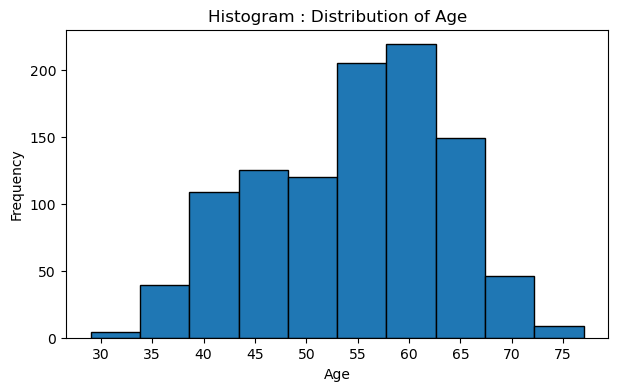

In [7]:
plt.figure(figsize=(7,4))

data = df['age']

plt.hist(data,bins=10,edgecolor='Black')

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram : Distribution of Age")
plt.xticks(range(30,80,5))
plt.show()

**Plotting crosstab of Heart Disease fequency per Chest Pain Type**

<Figure size 700x400 with 0 Axes>

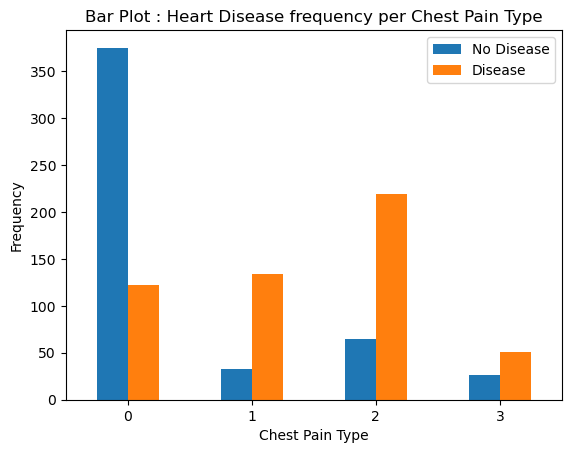

In [26]:
data = pd.crosstab(df['cp'],df['target'])

plt.figure(figsize=(7,4))

data.plot.bar()

plt.title("Bar Plot : Heart Disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

### Correlation Matrix

Visulaizing the data features to find the correlation between them which will infer the important features.

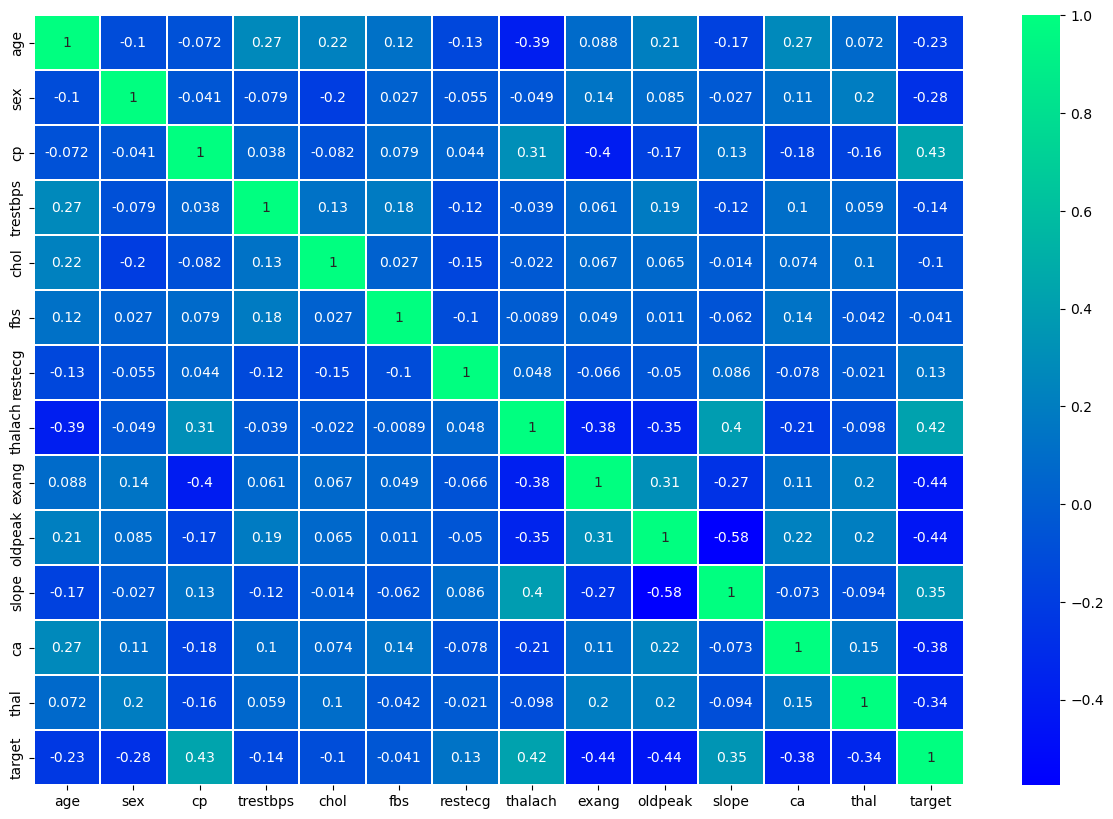

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

Inference: From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target. Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.

**Relation between each features distribution with the help of histogram.**

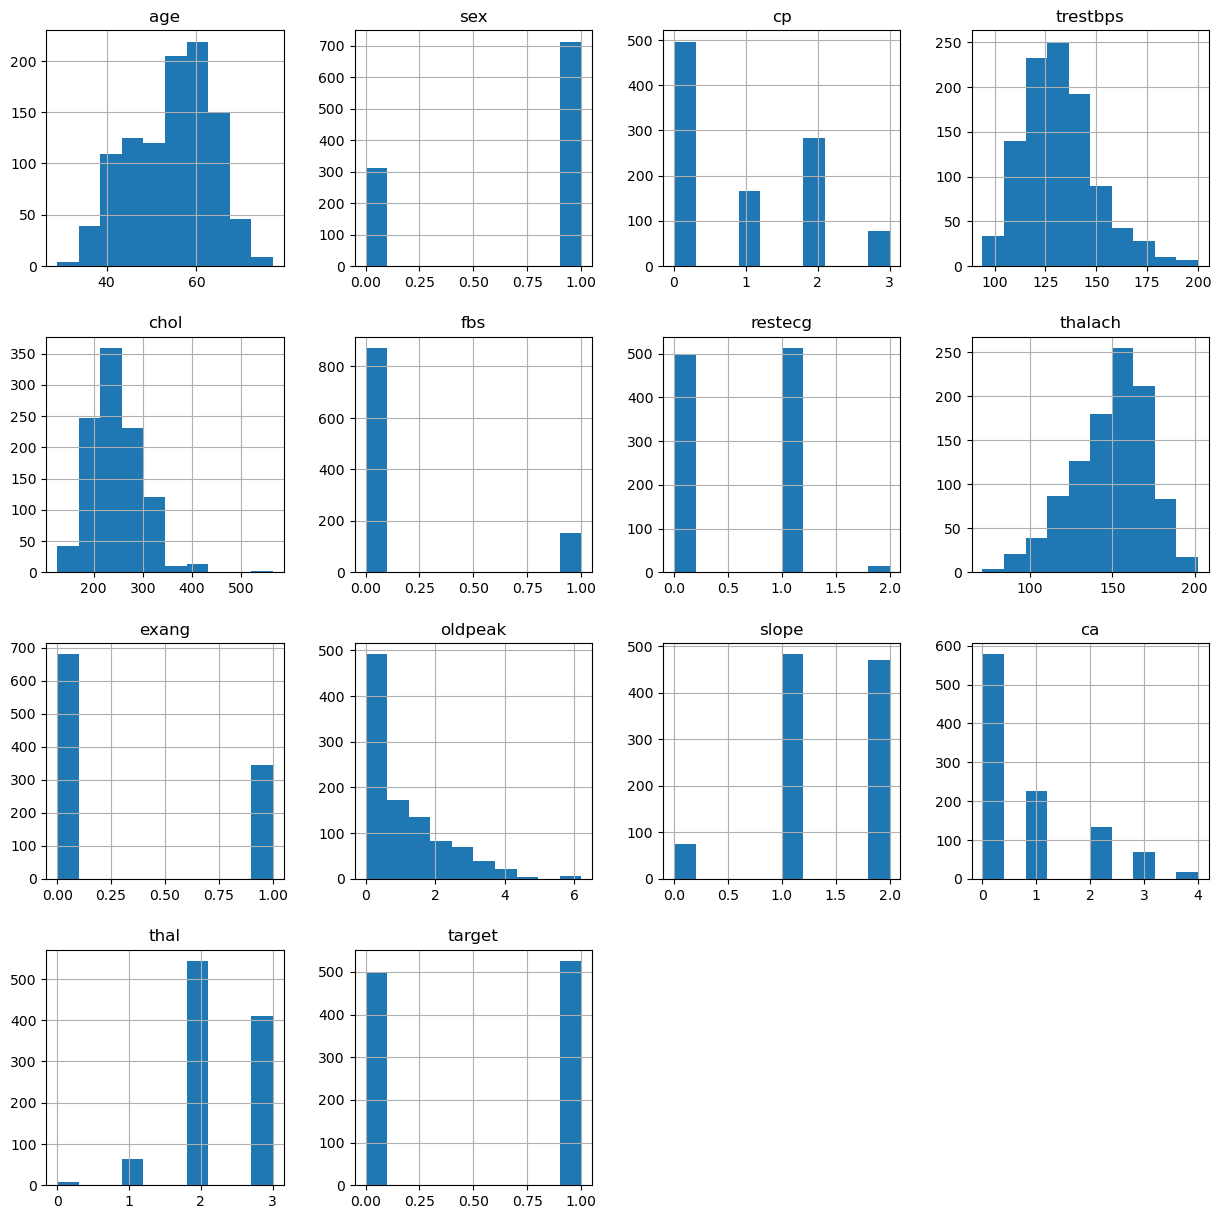

In [10]:
df.hist(figsize=(15,15))
plt.savefig('featuresplot')

### Train-Test Split

In [11]:
X = df.drop(['target'],axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [12]:
# Data Preprocessing

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train_scal = scalar.fit_transform(X_train)
X_test_scal = scalar.fit_transform(X_test)

### Algorithm Implementation

### Logistic Regression

Testing Accuracy for Logistic Regression: 0.8326848249027238
Testing Sensitivity for Logistic Regression: 0.8225806451612904
Testing Specificity for Logistic Regression: 0.8421052631578947
Testing Precision for Logistic Regression: 0.8292682926829268

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       123
           1       0.84      0.84      0.84       134

    accuracy                           0.83       257
   macro avg       0.83      0.83      0.83       257
weighted avg       0.83      0.83      0.83       257



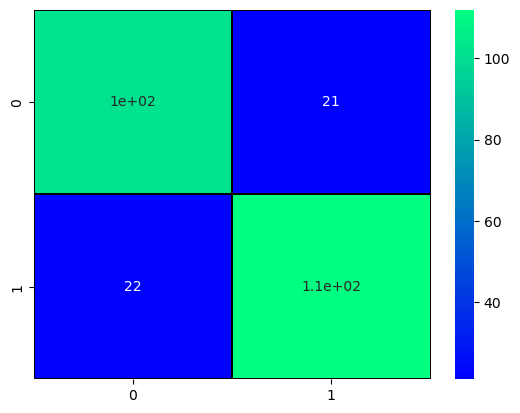

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr = LogisticRegression(
    C=1.0, class_weight='balanced', dual=False,
    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
    random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
    warm_start=False
)

model1 = lr.fit(X_train_scal, y_train)

prediction1 = model1.predict(X_test_scal)

cm1 = confusion_matrix(y_test, prediction1)
sns.heatmap(cm1, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 10})

TP = cm1[0][0]
TN = cm1[1][1]
FN = cm1[1][0]
FP = cm1[0][1]

print('Testing Accuracy for Logistic Regression:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Logistic Regression:', (TP / (TP + FN)))
print('Testing Specificity for Logistic Regression:', (TN / (TN + FP)))
print('Testing Precision for Logistic Regression:', (TP / (TP + FP)))
print()

print(classification_report(y_test, prediction1))

Inference: From the above report, we get the accuracy of the Logistic Regression classifier is about 83%.

### Decision Tree

Testing Accuracy for Decision Tree: 0.8871595330739299
Testing Sensitivity for Decision Tree: 0.8615384615384616
Testing Specificity for Decision Tree: 0.9133858267716536
Testing Precision for Decision Tree: 0.9105691056910569

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       123
           1       0.91      0.87      0.89       134

    accuracy                           0.89       257
   macro avg       0.89      0.89      0.89       257
weighted avg       0.89      0.89      0.89       257



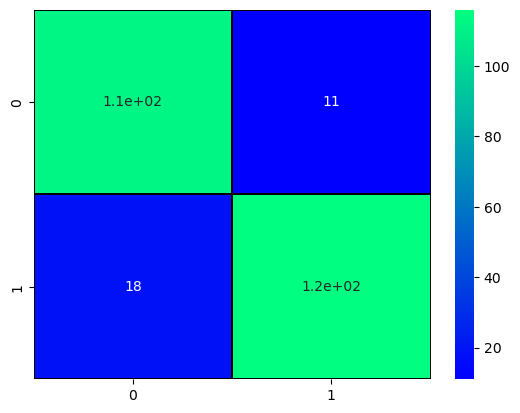

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')

model2 = tree_model.fit(X_train_scal, y_train)

prediction2 = model2.predict(X_test_scal)

cm2 = confusion_matrix(y_test, prediction2)
sns.heatmap(cm2, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 10})

TP = cm2[0][0]
TN = cm2[1][1]
FN = cm2[1][0]
FP = cm2[0][1]

print('Testing Accuracy for Decision Tree:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Decision Tree:', (TP / (TP + FN)))
print('Testing Specificity for Decision Tree:', (TN / (TN + FP)))
print('Testing Precision for Decision Tree:', (TP / (TP + FP)))
print()

print(classification_report(y_test, prediction2))

Inference: From the above report, we get the accuracy of the Decision Tree classifier is about 89%.

### Random Forest Classifier

Testing Accuracy for Random Forest: 0.9571984435797666
Testing Sensitivity for Random Forest: 0.9516129032258065
Testing Specificity for Random Forest: 0.9624060150375939
Testing Precision for Random Forest: 0.959349593495935

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       123
           1       0.96      0.96      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



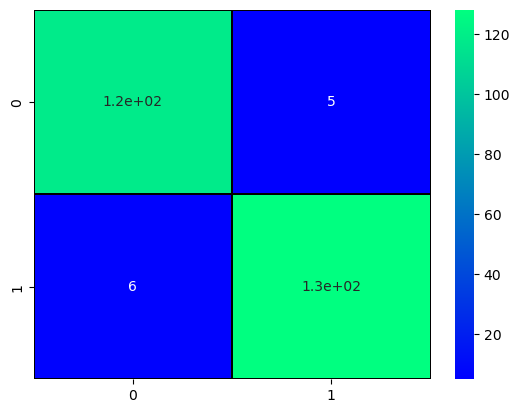

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=8, min_samples_split=5)

model3 = rfc.fit(X_train_scal, y_train)

prediction3 = model3.predict(X_test_scal)

cm3 = confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 10})

TP = cm3[0][0]
TN = cm3[1][1]
FN = cm3[1][0]
FP = cm3[0][1]

print('Testing Accuracy for Random Forest:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Random Forest:', (TP / (TP + FN)))
print('Testing Specificity for Random Forest:', (TN / (TN + FP)))
print('Testing Precision for Random Forest:', (TP / (TP + FP)))
print()

print(classification_report(y_test, prediction3))

Inference: From the above report, we can get the accuracy of the Random Forest classifier is about 96%.

### Support Vector Machines (SVM)

Testing Accuracy for SVM: 0.8521400778210116
Testing Sensitivity for SVM: 0.8761061946902655
Testing Specificity for SVM: 0.8333333333333334
Testing Precision for SVM: 0.8048780487804879

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       123
           1       0.83      0.90      0.86       134

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257



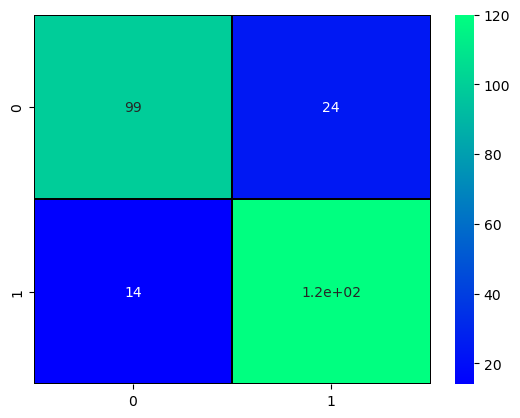

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

svm = SVC(C=12, kernel='linear')

model4 = svm.fit(X_train_scal, y_train)

prediction4 = model4.predict(X_test_scal)

cm4 = confusion_matrix(y_test, prediction4)
sns.heatmap(cm4, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 10})

TP = cm4[0][0]
TN = cm4[1][1]
FN = cm4[1][0]
FP = cm4[0][1]

print('Testing Accuracy for SVM:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for SVM:', (TP / (TP + FN)))
print('Testing Specificity for SVM:', (TN / (TN + FP)))
print('Testing Precision for SVM:', (TP / (TP + FP)))
print()

print(classification_report(y_test, prediction4))

Inference: From the above report, we get the accuracy of the Support Vector Machine classifier is about 85%.

### Gussian Naive Bayes

Testing Accuracy for Naive Bayes: 0.8210116731517509
Testing Sensitivity for Naive Bayes: 0.8235294117647058
Testing Specificity for Naive Bayes: 0.8188405797101449
Testing Precision for Naive Bayes: 0.7967479674796748

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       123
           1       0.82      0.84      0.83       134

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



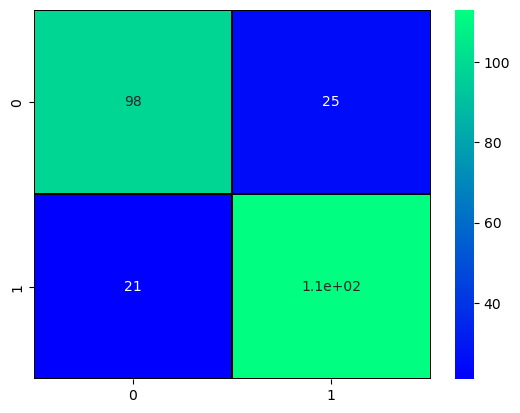

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model5 = gnb.fit(X_train_scal, y_train)

prediction5 = model5.predict(X_test_scal)

cm5 = confusion_matrix(y_test, prediction5)
sns.heatmap(cm5, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 10})

TP = cm5[0][0]
TN = cm5[1][1]
FN = cm5[1][0]
FP = cm5[0][1]

print('Testing Accuracy for Naive Bayes:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Naive Bayes:', (TP / (TP + FN)))
print('Testing Specificity for Naive Bayes:', (TN / (TN + FP)))
print('Testing Precision for Naive Bayes:', (TP / (TP + FP)))
print()

print(classification_report(y_test, prediction5))

Inference: From the above report, we get the accuracy of the Naive Bayes is about 82%.

### Cumulative Results of Algorithms Accuracy

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [20]:
results = fit_and_score(models,
              X_train = X_train_scal,
              y_train = y_train,
              X_test = X_test_scal,
              y_test = y_test)
results

{'Logistic Regression': 0.8326848249027238,
 'Decision Tree': 0.9221789883268483,
 'Random Forest': 0.9922178988326849,
 'SVM': 0.9182879377431906,
 'Naive Bayes': 0.8210116731517509}

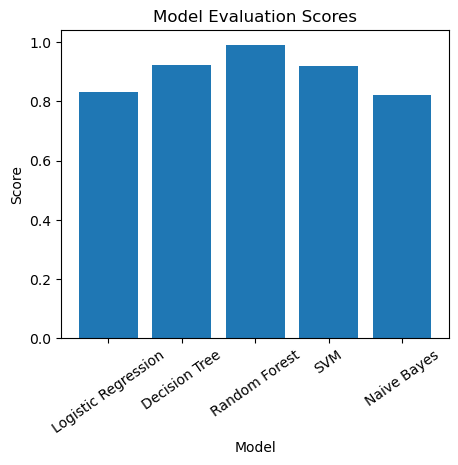

In [21]:
scores = results

model_names = list(scores.keys())
model_scores = list(scores.values())

plt.figure(figsize=(5, 4))
plt.bar(model_names, model_scores)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title("Model Evaluation Scores")
plt.xticks(rotation=35)
plt.show()

### Best Model being Tested

We apply the best working algorithm (i.e., Random Forest Classifier) into our model and check whether our model will result in the correct output or not with the help of available data. List of features used to predict the target variable (heart disease or no heart disease) along with their descriptions and potential values:

    Age:
        Description: Age of the individual.

    Sex/Gender:
        Description: Gender of the individual.
        Values: [1=Male, 0=Female]

    Chest Pain Type (CP):
        Description: Chest pain type.
        Values: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic

    Resting Blood Pressure (Trestbps):
        Description: Resting blood pressure.

    Serum Cholesterol (Chol):
        Description: Serum cholesterol.

    Fasting Blood Sugar (Fbs):
        Description: Fasting blood sugar.
        Values: 1 = True (> 120 mg/dl), 0 = False (<= 120 mg/dl)

    Resting Electrocardiographic Results (Restecg):
        Description: Resting electrocardiographic results.
        Values: 0 = Nothing to Note, 1 = ST-T Wave Abnormality, 2 = Possible or Definite Left Ventricular Hypertrophy

    Maximum Heart Rate Achieved (Thalach):
        Description: Maximum heart rate achieved.

    Exercise-Induced Angina (Exang):
        Description: Exercise-induced angina.
        Values: 1 = Yes, 0 = No

    ST Depression Induced by Exercise Relative to Rest (Oldpeak):
        Description: ST depression induced by exercise relative to rest.

    Slope of the Peak Exercise ST Segment (Slope):
        Description: The slope of the peak exercise ST segment.

    Number of Major Vessels Colored by Fluoroscopy (Ca):
        Description: Number of major vessels (0-3) colored by fluoroscopy.

    Thallium Stress Result (Thal):
        Description: Thallium stress result.
        Values: 1, 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect

    Target:
        Description: Target variable indicating the presence or absence of heart disease.
        Values: [1 = Have Disease, 0 = Have No Disease]


**Case 1: Expecting Positive Outcome (1)**

In [28]:
input_data = (59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2)
input_as_numpy = np.asarray(input_data)
input_reshaped = input_as_numpy.reshape(1, -1)

prediction3 = model3.predict(input_reshaped)

if prediction3 == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be normal :)")

The patient seems to have heart disease :(


**Case 2: Expecting Negative Outcome (0)**

In [23]:
input_data = (50, 0, 0, 110, 254, 0, 0, 159, 0, 0, 2, 0, 2)
input_as_numpy = np.asarray(input_data)
input_reshaped = input_as_numpy.reshape(1, -1)

prediction3 = model3.predict(input_reshaped)

if prediction3 == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be normal :)")

The patient seems to be normal :)


### Pickling the Model file for Deployment

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scal, y_train)

RandomForestClassifier(random_state=42)

In [25]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scalar, scaler_file)